<a href="https://colab.research.google.com/github/rojroji/crime-prediction/blob/master/crime%20prediction%20(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prepro
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from collections import Counter
import os, sys
from copy import deepcopy
import numpy as np
import pandas as pd

import torch as th
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
import warnings

warnings.filterwarnings("ignore")


In [ ]:
!python --version

Python 3.8.10


In [ ]:
print(f"Torch version: {th.__version__}.  CUDA version: {th.version.cuda}")

Torch version: 1.13.1+cu116.  CUDA version: 11.6


In [ ]:
!pip install dgl==0.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dgl-cu110

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(f"Torch version: {th.__version__}.  CUDA version: {th.version.cuda}. dgl version: {th.__version__}")

Torch version: 1.13.1+cu116.  CUDA version: 11.6. dgl version: 1.13.1+cu116


In [ ]:
os.environ['DGLBACKEND'] = 'pytorch'
import dgl
from dgl import function as fn

In [ ]:
dgl.__version__

'0.6.1'

In [ ]:
from dgl.dataloading.pytorch import NodeDataLoader

In [ ]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_train=pd.read_csv("/content/gdrive/MyDrive/train.csv")
data_test=pd.read_csv("/content/gdrive/MyDrive/test.csv")

In [ ]:
data_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [ ]:
data_train['Catid']=data_train['Category'].replace('WARRANTS',0).replace('NON-CRIMINAL',0).replace('FORGERY/COUNTERFEITING',0).replace('SECONDARY CODES',0).replace('TRESPASS',0).replace('PROSTITUTION',0).replace('DISORDERLY CONDUCT',0).replace('ARSON',0).replace('EMBEZZLEMENT',0).replace('LOITERING',0).replace('GAMBLING',0).replace('BAD CHECKS',0).replace('TREA',0).replace('OTHER OFFENSES',0).replace('LARCENY/THEFT',0).replace('VEHICLE THEFT',1).replace('ROBBERY',1).replace('WEAPON LAWS',1).replace('BURGLARY',1).replace('SUSPICIOUS OCC',1).replace('DRUNKENNESS',1).replace('STOLEN PROPERTY',1).replace('FRAUD',1).replace('RUNAWAY',1).replace('DRIVING UNDER THE INFLUENCE',1).replace('LIQUOR LAWS',1).replace('BRIBERY',1).replace('RECOVERED VEHICLE',1).replace('VANDALISM',1).replace('ASSAULT',1).replace('DRUG/NARCOTIC',1).replace('MISSING PERSON',1).replace('KIDNAPPING',1).replace('SEX OFFENSES FORCIBLE',1).replace('FAMILY OFFENSES',1).replace('SUICIDE',1).replace('SEX OFFENSES NON FORCIBLE',1).replace('EXTORTION',1).replace('PORNOGRAPHY/OBSCENE MAT',1)

In [ ]:
data_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Catid
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0
...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,1
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,1


In [ ]:
for i in ['DayOfWeek','PdDistrict','Descript','Resolution']:
    data_train[i] = prepro.LabelEncoder().fit_transform(data_train[i])
    if i not in ['Category']:
        data_train[i] = prepro.LabelEncoder().fit_transform(data_train[i])

In [ ]:
for i in ['DayOfWeek','PdDistrict']:
    data_test[i] = prepro.LabelEncoder().fit_transform(data_test[i])
    if i not in ['Category']:
        data_test[i] = prepro.LabelEncoder().fit_transform(data_test[i])

In [ ]:
data_train.pop('Address')

0                 OAK ST / LAGUNA ST
1                 OAK ST / LAGUNA ST
2          VANNESS AV / GREENWICH ST
3           1500 Block of LOMBARD ST
4          100 Block of BRODERICK ST
                     ...            
878044    FARALLONES ST / CAPITOL AV
878045          600 Block of EDNA ST
878046            5TH ST / FOLSOM ST
878047          TOWNSEND ST / 2ND ST
878048      1800 Block of NEWCOMB AV
Name: Address, Length: 878049, dtype: object

In [ ]:
data_test.pop('Address')

0             2000 Block of THOMAS AV
1                  3RD ST / REVERE AV
2              2000 Block of GOUGH ST
3            4700 Block of MISSION ST
4            4700 Block of MISSION ST
                     ...             
884257        2600 Block of BRYANT ST
884258    1900 Block of WASHINGTON ST
884259       5500 Block of MISSION ST
884260        1500 Block of HUDSON AV
884261         1500 Block of SLOAT BL
Name: Address, Length: 884262, dtype: object

In [ ]:
data_train.pop('X')

0        -122.425892
1        -122.425892
2        -122.424363
3        -122.426995
4        -122.438738
             ...    
878044   -122.459033
878045   -122.447364
878046   -122.403390
878047   -122.390531
878048   -122.394926
Name: X, Length: 878049, dtype: float64

In [ ]:
data_train.pop('Y')

0         37.774599
1         37.774599
2         37.800414
3         37.800873
4         37.771541
            ...    
878044    37.714056
878045    37.731948
878046    37.780266
878047    37.780607
878048    37.738212
Name: Y, Length: 878049, dtype: float64

In [ ]:
data_test.pop('X')

0        -122.399588
1        -122.391523
2        -122.426002
3        -122.437394
4        -122.437394
             ...    
884257   -122.408983
884258   -122.425342
884259   -122.445418
884260   -122.387394
884261   -122.489714
Name: X, Length: 884262, dtype: float64

In [ ]:
data_test.pop('Y')

0         37.735051
1         37.732432
2         37.792212
3         37.721412
4         37.721412
            ...    
884257    37.751987
884258    37.792681
884259    37.712075
884260    37.739479
884261    37.733950
Name: Y, Length: 884262, dtype: float64

In [ ]:
data_train['year'] = pd.to_datetime(data_train['Dates']).dt.year
data_train['month'] = pd.to_datetime(data_train['Dates']).dt.month
data_train['day'] = pd.to_datetime(data_train['Dates']).dt.day
data_train['hour'] = pd.to_datetime(data_train['Dates']).dt.hour
data_train['minute'] = pd.to_datetime(data_train['Dates']).dt.minute

In [ ]:
data_test['year'] = pd.to_datetime(data_test['Dates']).dt.year
data_test['month'] = pd.to_datetime(data_test['Dates']).dt.month
data_test['day'] = pd.to_datetime(data_test['Dates']).dt.day
data_test['hour'] = pd.to_datetime(data_test['Dates']).dt.hour
data_test['minute'] = pd.to_datetime(data_test['Dates']).dt.minute

In [ ]:
data_train.pop('minute')

0         53
1         53
2         33
3         30
4         30
          ..
878044    15
878045     1
878046     1
878047     1
878048     1
Name: minute, Length: 878049, dtype: int64

In [ ]:
data_test.pop('minute')

0         59
1         51
2         50
3         45
4         45
          ..
884257     1
884258     1
884259     1
884260     1
884261     1
Name: minute, Length: 884262, dtype: int64

In [ ]:
data_train.pop('hour')

0         23
1         23
2         23
3         23
4         23
          ..
878044     0
878045     0
878046     0
878047     0
878048     0
Name: hour, Length: 878049, dtype: int64

In [ ]:
data_test.pop('hour')

0         23
1         23
2         23
3         23
4         23
          ..
884257     0
884258     0
884259     0
884260     0
884261     0
Name: hour, Length: 884262, dtype: int64

In [ ]:
data_train.pop('Dates')

0         2015-05-13 23:53:00
1         2015-05-13 23:53:00
2         2015-05-13 23:33:00
3         2015-05-13 23:30:00
4         2015-05-13 23:30:00
                 ...         
878044    2003-01-06 00:15:00
878045    2003-01-06 00:01:00
878046    2003-01-06 00:01:00
878047    2003-01-06 00:01:00
878048    2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: object

In [ ]:
data_test.pop('Dates')

0         2015-05-10 23:59:00
1         2015-05-10 23:51:00
2         2015-05-10 23:50:00
3         2015-05-10 23:45:00
4         2015-05-10 23:45:00
                 ...         
884257    2003-01-01 00:01:00
884258    2003-01-01 00:01:00
884259    2003-01-01 00:01:00
884260    2003-01-01 00:01:00
884261    2003-01-01 00:01:00
Name: Dates, Length: 884262, dtype: object

In [ ]:
data_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Catid,year,month,day
0,WARRANTS,866,6,4,0,0,2015,5,13
1,OTHER OFFENSES,810,6,4,0,0,2015,5,13
2,OTHER OFFENSES,810,6,4,0,0,2015,5,13
3,LARCENY/THEFT,404,6,4,11,0,2015,5,13
4,LARCENY/THEFT,404,6,5,11,0,2015,5,13
...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,661,1,8,11,1,2003,1,6
878045,LARCENY/THEFT,404,1,2,11,0,2003,1,6
878046,LARCENY/THEFT,404,1,7,11,0,2003,1,6
878047,VANDALISM,496,1,7,11,1,2003,1,6


In [ ]:
for i in ['DayOfWeek','PdDistrict','Descript','Resolution','Category']:
    data_train[i] = prepro.LabelEncoder().fit_transform(data_train[i])
    if i not in ['Category']:
        data_train[i] = prepro.LabelEncoder().fit_transform(data_train[i])

In [ ]:
data_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Catid,year,month,day
0,37,866,6,4,0,0,2015,5,13
1,21,810,6,4,0,0,2015,5,13
2,21,810,6,4,0,0,2015,5,13
3,16,404,6,4,11,0,2015,5,13
4,16,404,6,5,11,0,2015,5,13
...,...,...,...,...,...,...,...,...,...
878044,25,661,1,8,11,1,2003,1,6
878045,16,404,1,2,11,0,2003,1,6
878046,16,404,1,7,11,0,2003,1,6
878047,35,496,1,7,11,1,2003,1,6


In [ ]:
data_test

,Id,DayOfWeek,PdDistrict,year,month,day
0,0,3,0,2015,5,10
1,1,3,0,2015,5,10
2,2,3,4,2015,5,10
3,3,3,2,2015,5,10
4,4,3,2,2015,5,10
...,...,...,...,...,...,...
884257,884257,6,3,2003,1,1
884258,884258,6,4,2003,1,1
884259,884259,6,2,2003,1,1
884260,884260,6,0,2003,1,1


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Category    878049 non-null  int64
 1   Descript    878049 non-null  int64
 2   DayOfWeek   878049 non-null  int64
 3   PdDistrict  878049 non-null  int64
 4   Resolution  878049 non-null  int64
 5   Catid       878049 non-null  int64
 6   year        878049 non-null  int64
 7   month       878049 non-null  int64
 8   day         878049 non-null  int64
dtypes: int64(9)
memory usage: 60.3 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Id          884262 non-null  int64
 1   DayOfWeek   884262 non-null  int64
 2   PdDistrict  884262 non-null  int64
 3   year        884262 non-null  int64
 4   month       884262 non-null  int64
 5   day         884262 non-null  int64
dtypes: int64(6)
memory usage: 40.5 MB


In [ ]:
#do not run
data_train['dataset'] = 'train'
data_test['dataset'] = 'test'

In [ ]:
data=data_train
data

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Catid,year,month,day
0,37,866,6,4,0,0,2015,5,13
1,21,810,6,4,0,0,2015,5,13
2,21,810,6,4,0,0,2015,5,13
3,16,404,6,4,11,0,2015,5,13
4,16,404,6,5,11,0,2015,5,13
...,...,...,...,...,...,...,...,...,...
878044,25,661,1,8,11,1,2003,1,6
878045,16,404,1,2,11,0,2003,1,6
878046,16,404,1,7,11,0,2003,1,6
878047,35,496,1,7,11,1,2003,1,6


In [ ]:
#don't RUN
data_train.pop('dataset')

KeyError: ignored

In [ ]:
data.shape

(878049, 9)

In [ ]:
data.nunique()

Category       39
Descript      879
DayOfWeek       7
PdDistrict     10
Resolution     17
Catid           2
year           13
month          12
day            31
dtype: int64

In [ ]:
data

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Catid,year,month,day
0,37,866,6,4,0,0,2015,5,13
1,21,810,6,4,0,0,2015,5,13
2,21,810,6,4,0,0,2015,5,13
3,16,404,6,4,11,0,2015,5,13
4,16,404,6,5,11,0,2015,5,13
...,...,...,...,...,...,...,...,...,...
878044,25,661,1,8,11,1,2003,1,6
878045,16,404,1,2,11,0,2003,1,6
878046,16,404,1,7,11,0,2003,1,6
878047,35,496,1,7,11,1,2003,1,6


In [ ]:
data.groupby('Category')['PdDistrict'].nunique().describe().astype('int64')

count    39
mean      9
std       1
min       4
25%      10
50%      10
75%      10
max      10
Name: PdDistrict, dtype: int64

In [ ]:
data.groupby('PdDistrict')['Category'].nunique().describe().astype('int64')

count    10
mean     38
std       0
min      37
25%      38
50%      38
75%      39
max      39
Name: Category, dtype: int64

In [ ]:
data.head

<bound method NDFrame.head of         Category  Descript  DayOfWeek  PdDistrict  Resolution  Catid  year  \
0             37       866          6           4           0      0  2015   
1             21       810          6           4           0      0  2015   
2             21       810          6           4           0      0  2015   
3             16       404          6           4          11      0  2015   
4             16       404          6           5          11      0  2015   
...          ...       ...        ...         ...         ...    ...   ...   
878044        25       661          1           8          11      1  2003   
878045        16       404          1           2          11      0  2003   
878046        16       404          1           7          11      0  2003   
878047        35       496          1           7          11      1  2003   
878048        12       204          1           0          11      0  2003   

        month  day  
0           

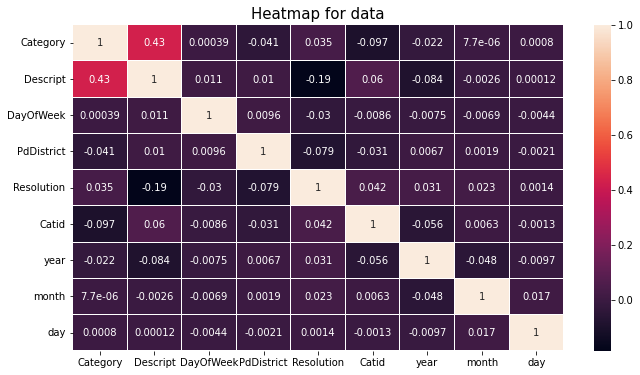

In [ ]:
fig = plt.figure(figsize=(11, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.1)
plt.title('Heatmap for data', fontsize=15)
plt.show()

In [ ]:
def column_index(series, offset=0):
    return {k: v+offset for v, k in enumerate(series.value_counts().index.values)}

In [ ]:
cat2idx = {v: idx for idx, v in enumerate(data['Category'].values)}
pdd2idx = column_index(data['PdDistrict'])

In [ ]:
data['catIdx'] = data['Category'].map(cat2idx)
data = data.sort_values(by='catIdx')
data['PdDistrict'] = data['PdDistrict'].map(pdd2idx)

In [ ]:
y_cxn = data.sort_values(by='catIdx')['Catid'].values
y_cxn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
baseline = y_cxn[y_cxn>=0].mean()
baseline

0.4535771921612575

In [ ]:
node_id_cols = ['catIdx', 'PdDistrict']

In [ ]:
data[node_id_cols].head()

,catIdx,PdDistrict
316490,337880,4
93716,337880,1
21002,337880,3
192190,337880,3
107733,337880,2


In [ ]:
N_nodes = data[node_id_cols].nunique().sum()
N_nodes

49

Construct edges

In [ ]:
from itertools import combinations

In [ ]:
edge_dict = dict()
for src_type, dst_type in combinations(node_id_cols, 2):
    fwd = (src_type, f'{src_type}-{dst_type}', dst_type)
    bwd = (dst_type, f'{dst_type}-{src_type}', src_type)
    print(fwd)
    print(bwd)
    print('-'*50)
    
    edges = data[[src_type, dst_type]].drop_duplicates().values
    src = edges[:,0]
    dst = edges[:,1]

    edge_dict[fwd] = (th.tensor(src), th.tensor(dst))
    edge_dict[bwd] = (th.tensor(dst), th.tensor(src))

('catIdx', 'catIdx-PdDistrict', 'PdDistrict')
('PdDistrict', 'PdDistrict-catIdx', 'catIdx')
--------------------------------------------------


In [ ]:
hg = dgl.heterograph(edge_dict)

In [ ]:
hg.ntypes

['PdDistrict', 'catIdx']

In [ ]:
label_feat = dict()
for ntype in hg.ntypes:
    if ntype=='catIdx':
        continue
    label_feat[ntype] = th.zeros(hg.number_of_nodes(ntype))+baseline
label_feat['catIdx'] = th.tensor(np.nan_to_num(y_cxn, nan=baseline)).float()

In [ ]:
hg.ndata['label'] = label_feat

In [ ]:
hg

Graph(num_nodes={'PdDistrict': 10, 'catIdx': 878049},
      num_edges={('PdDistrict', 'PdDistrict-catIdx', 'catIdx'): 382, ('catIdx', 'catIdx-PdDistrict', 'PdDistrict'): 382},
      metagraph=[('PdDistrict', 'catIdx', 'PdDistrict-catIdx'), ('catIdx', 'PdDistrict', 'catIdx-PdDistrict')])

In [ ]:
hg.ndata

defaultdict(<class 'dict'>, {'label': {'PdDistrict': tensor([0.4536, 0.4536, 0.4536, 0.4536, 0.4536, 0.4536, 0.4536, 0.4536, 0.4536,
        0.4536]), 'catIdx': tensor([0., 0., 0.,  ..., 0., 0., 0.])}})

In [ ]:
assert hg.number_of_nodes('catIdx')==y_cxn.shape[0]
assert (data['Catid']==1).sum() == (dgl.to_homogeneous(hg, ndata=['label']).ndata['label']==1).sum().item()

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
import warnings

warnings.filterwarnings("ignore")

In [ ]:
undirected_G = nx.Graph()

In [ ]:
for idx in data.index:
    p1 = data.loc[idx]['catIdx']
    p2 = data.loc[idx]['PdDistrict']
    if undirected_G.has_edge(p1, p2):
        undirected_G.edges[p1, p2]['weight'] += 1
    else:
        undirected_G.add_edge(p1, p2, weight=1)

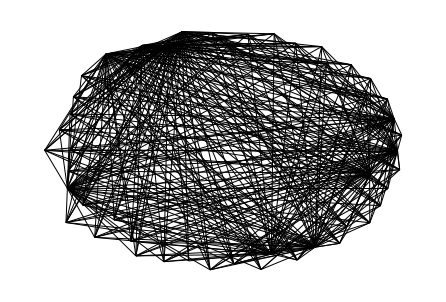

In [ ]:
from operator import pos
pos = nx.spring_layout(undirected_G,k=3000,seed=50)
color_map=[]
for node in undirected_G.nodes:
  if 0 <= data.loc[idx]["catIdx"]<=39:
      color_map.append("yellow")
  elif 40< data.loc[idx]["PdDistrict"]<=1000:
      color_map.append("blue")
nx.draw(undirected_G,pos,node_color=color_map,node_size=1)
plt.show()

In [ ]:
for n in sorted(undirected_G.nodes()):
    undirected_G.nodes[n]['PdDistrict'] = float(n)

In [ ]:
list(undirected_G.nodes(data=True))[:5]

[(337880, {'PdDistrict': 337880.0}),
 (4, {'PdDistrict': 4.0}),
 (1, {'PdDistrict': 1.0}),
 (3, {'PdDistrict': 3.0}),
 (2, {'PdDistrict': 2.0})]

In [ ]:
list(undirected_G.edges(data=True))[:5]

[(337880, 4, {'weight': 2}),
 (337880, 1, {'weight': 2}),
 (337880, 3, {'weight': 4}),
 (337880, 2, {'weight': 2}),
 (4, 659768, {'weight': 179})]

In [ ]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 27.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
sorted(nx.degree_centrality(undirected_G).items(), key=lambda x : x[1], reverse=True)[:5]

[(4, 0.8125), (1, 0.8125), (3, 0.8125), (2, 0.8125), (5, 0.7916666666666666)]

In [ ]:
sorted(nx.betweenness_centrality(undirected_G, normalized=False).items(), key=lambda x : x[1], reverse=True)[:5]

[(4, 82.47500000000005),
 (1, 82.47500000000005),
 (3, 82.47500000000005),
 (2, 82.47500000000005),
 (5, 71.47500000000007)]

In [ ]:
sorted(nx.betweenness_centrality(undirected_G).items(), key=lambda x : x[1], reverse=True)[:5]

[(4, 0.07311613475177309),
 (1, 0.07311613475177309),
 (3, 0.07311613475177309),
 (2, 0.07311613475177309),
 (5, 0.06336436170212771)]

In [ ]:
sorted(nx.load_centrality(undirected_G).items(), key=lambda x : x[1], reverse=True)[:5]

[(4, 0.07311613475177299),
 (1, 0.07311613475177299),
 (3, 0.07311613475177299),
 (2, 0.07311613475177299),
 (5, 0.06336436170212761)]

In [ ]:
n_hops = 10
sampler = dgl.dataloading.MultiLayerNeighborSampler([10]*n_hops)

In [ ]:
dataloader_legit = NodeDataLoader(
    hg, {'catIdx': np.where(y_cxn==0)[0]}, sampler,
    batch_size=1, shuffle=False, drop_last=False, num_workers=0)

In [ ]:
n_hops = 5
sampler = dgl.dataloading.MultiLayerNeighborSampler([10]*n_hops)

In [ ]:
dataloader_legit = NodeDataLoader(
    hg, {'catIdx': np.where(y_cxn==0)[0]}, sampler,
    batch_size=1, shuffle=False, drop_last=False, num_workers=0)

In [ ]:
plt.show(dataloader_legit)

In [ ]:
import networkx as nx

In [ ]:
def draw_kkl_hg(hg, **kwargs):
    
    hg_label = hg.ndata['label']['catIdx'].int()
    
    g = dgl.to_homogeneous(hg)
    g.ndata['ntype'] = g.ndata['_TYPE']
    nx_G = g.to_networkx(node_attrs=['ntype']).to_undirected()
    fig, ax = plt.subplots(figsize=(10,10))
    
    pos = nx.spring_layout(nx_G, k=5/np.sqrt(g.num_nodes()))
    
    nodeShapes = ["^", "s", "o", "v"]
    # For each node class...
    for idx, ntype in enumerate(hg.ntypes):
        aShape = nodeShapes[idx]
        if ntype=='catIdx':
            node_color = ['blue' if v==0 else 'red' if v==1 else 'black' for v in hg_label]
        else:
            node_color = "grey"
        nx.draw_networkx_nodes(
            nx_G, pos, node_shape=aShape, node_color=node_color, cmap='bwr', node_size=200,
            nodelist=[sNode[0] for sNode in filter(lambda x: x[1]["ntype"]==idx, nx_G.nodes(data=True))]
        )

    # Draw the edges between the nodes
    nx.draw_networkx_edges(nx_G, pos)

def plot_neighborhood(dataloader, N_plots=5):
    nstats = dict()
    for i, (input_nodes, output_nodes, blocks) in enumerate(dataloader):
        if i >= N_plots:
            break
        hg_tmp = dgl.node_subgraph(hg, input_nodes)
        draw_kkl_hg(hg_tmp)     
        

def neighborhood_stats(hg):
    def mp_fn_dict(in_feat, out_feat):
        return {
            cetype: (fn.copy_u(in_feat, 'm'), fn.sum('m', out_feat))
            for cetype in hg.canonical_etypes
        }
    
    with hg.local_scope():
        degree_data = dict()
        for ntype in hg.ntypes:
            in_degrees = th.zeros(hg.num_nodes(ntype))
            for cetype in hg.canonical_etypes:
                if cetype[2]==ntype:
#                     print(cetype)
                    in_degrees += hg.in_degrees(etype=cetype)
            degree_data[ntype] = in_degrees

        hg.ndata['degree'] = degree_data
        hg.ndata['cat'] = {
            ntype: (labels==1).float() for ntype, labels in hg.ndata['label'].items()
        }
        
        hg.multi_update_all(mp_fn_dict('degree', 'd_sum'), cross_reducer='sum')
        hg.multi_update_all(mp_fn_dict('cat', 'total_crime'), cross_reducer='sum')
        hg.multi_update_all(mp_fn_dict('total_crime', 'total_crime_2hop'), cross_reducer='sum')
        
        n_2hop = hg.ndata['d_sum']['catIdx']
        fraud_rate_2hop = hg.ndata['total_crime_2hop']['catIdx'] / hg.ndata['d_sum']['catIdx']
    return n_2hop, fraud_rate_2hop

In [ ]:
n_hops = 4
sampler = dgl.dataloading.MultiLayerNeighborSampler([10]*n_hops)

In [ ]:
dataloader_legit = NodeDataLoader(
    hg, {'catIdx': np.where(y_cxn==0)[0]}, sampler,
    batch_size=1, shuffle=False, drop_last=False, num_workers=0)

In [ ]:
dataloader_crime = NodeDataLoader(
    hg, {'catIdx': np.where(y_cxn==1)[0]}, sampler,
    batch_size=1, shuffle=False, drop_last=False, num_workers=0)

In [ ]:
n_4hop, crime_rate_2hop = neighborhood_stats(hg)

In [ ]:
N_labels = data['Catid'].shape[0]

In [ ]:
data_nstats = pd.DataFrame({
    'N_4hop': n_4hop[:N_labels], 
    'crime_rate_2hop':crime_rate_2hop[:N_labels], 
    'label': y_cxn[:N_labels],
})

In [ ]:
data_nstats.groupby('label').describe().T

label                              0              1
N_4hop          count  479786.000000  398263.000000
                mean        0.028663       0.002124
                std         3.308834       0.815903
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         0.000000       0.000000
                75%         0.000000       0.000000
                max       382.000000     382.000000
crime_rate_2hop count      36.000000       3.000000
                mean        0.057592       0.066483
                std         0.000000       0.009758
                min         0.057592       0.057592
                25%         0.057592       0.061263
                50%         0.057592       0.064935
                75%         0.057592       0.070929
                max         0.057592       0.076923

In [ ]:
data.nunique().sort_values(ascending=False)

Descript      879
Category       39
catIdx         39
day            31
Resolution     17
year           13
month          12
PdDistrict     10
DayOfWeek       7
Catid           2
dtype: int64

In [ ]:
df_nstats = pd.DataFrame({
    'N_4hop': n_4hop[:N_labels], 
    'crime_rate_2hop': crime_rate_2hop[:N_labels], 
    'label': y_cxn[:N_labels],
})

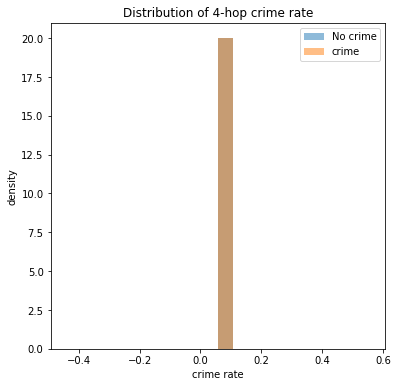

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
_, bins, _ = ax.hist(data_nstats[data_nstats['label']==0]['crime_rate_2hop'], bins=20, alpha=0.5, density=True, label='No crime')
_ = ax.hist(data_nstats[data_nstats['label']==1]['crime_rate_2hop'], bins=bins, alpha=0.5, density=True, label='crime')
ax.set(xlabel='crime rate', ylabel='density', 
       title=f'Distribution of {n_hops}-hop crime rate')
_ = ax.legend()

(array([157182., 119908., 105296.,  89431.,  85460.,  81809.,  78845.,
         65596.,  49313.,  45209.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

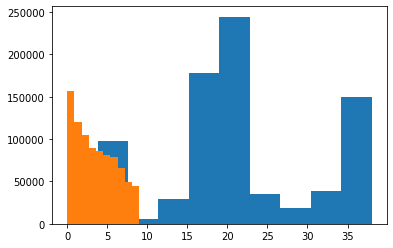

In [ ]:
plt.hist(data['Category'].dropna().values)
plt.hist(data['PdDistrict'].dropna().values)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score

In [ ]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')
    
def plot_pr(y_trues, y_preds, labels):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        auc = roc_auc_score(y_true, y_pred)
        pr, re, thresholds = precision_recall_curve(y_true, y_pred)
        ax.plot(re, pr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)
        
        f1_scores = 2*re*pr/(re+pr)
        print(labels[i])
        print('Best threshold: ', thresholds[np.argmax(f1_scores)])
        print('Best F1-Score: ', np.max(f1_scores))

    ax.legend()
    ax.grid()
    ax.set_title('Precision-Recall curve')
    ax.set_xlabel('Recall')
    _ = ax.set_ylabel('Precision')

In [ ]:
baseline

0.4535771921612575

In [ ]:
# Indicies w/ labels (training data)
labeled_mask = np.zeros_like(y_cxn, dtype=bool)
labeled_mask[:N_labels] = 1
assert y_cxn[labeled_mask].mean()==baseline

In [ ]:
# Split of training data into train/validation sets
rng = np.random.default_rng(1)
train_rate = 0.7
train_mask = (rng.random(y_cxn.shape[0])>(1-train_rate))&labeled_mask
val_mask = ~train_mask&labeled_mask

In [ ]:
test_mask = ~labeled_mask

In [ ]:
y_cxn[train_mask].mean(), y_cxn[val_mask].mean()

(0.45391440747327777, 0.45279066060435846)

In [ ]:
y_cxn[train_mask].sum(), y_cxn[val_mask].sum()

(278959, 119304)

In [ ]:
data.nunique().sort_values(ascending=False)

Descript      879
Category       39
catIdx         39
day            31
Resolution     17
year           13
month          12
PdDistrict     10
DayOfWeek       7
Catid           2
dtype: int64

In [ ]:
X_amt = ((data['Resolution']>0)*1).values
X_value = data['Descript'].values

In [ ]:
categorical = ['day', 'year', 'month']
X_ohe = pd.get_dummies(data[categorical].astype(str), drop_first=True).values
X_num = np.concatenate([X_amt.reshape((-1,1)), X_value.reshape((-1,1))], axis=1)
X_num = (X_num - X_num.mean(axis=0))/(X_num.max(axis=0) - X_num.min(axis=0))

In [ ]:
X = np.concatenate([X_ohe, X_num], axis=1)

In [ ]:
X.shape

(878049, 55)

In [ ]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.76492998,  0.39631046],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.76492998,  0.39631046],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.23507002,  0.39631046],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.23507002, -0.27339341],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.23507002, -0.30870093],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.23507002, -0.30870093]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = LogisticRegression()
clf.fit(X[train_mask,:], y_cxn[train_mask])

y_hat_val_lr = clf.predict_proba(X[val_mask,:])
y_val_lr = clf.predict(X[val_mask,:])

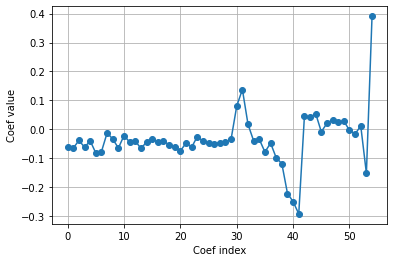

In [ ]:
fig, ax = plt.subplots()
ax.plot(clf.coef_[0,:], '-o')
ax.set(xlabel='Coef index', ylabel='Coef value')
_ = ax.grid()

#impportance of the features

In [ ]:
corrs = list()
for col in range(X.shape[1]):
    corr = np.corrcoef(X[train_mask,col], y_cxn[train_mask])[0,1]
    corrs.append(corr)
corrs = np.array(corrs)

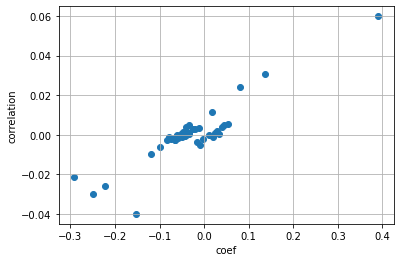

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=clf.coef_[0,:], y=corrs)
ax.set(xlabel='coef', ylabel='correlation')
_ = ax.grid()

In [ ]:
np.flip(np.argsort(np.nan_to_num(corrs, nan=-2)))

array([54, 31, 30, 32, 44, 34, 42, 33, 43,  7, 10, 23, 49, 36,  2,  4,  8,
       48, 17, 29, 24, 18, 15, 16, 21, 47, 12, 22, 28, 52, 14, 27,  3, 11,
       25, 19, 46, 26, 35,  0,  6,  1, 20, 50,  5, 13,  9, 51, 45, 37, 38,
       41, 39, 40, 53])

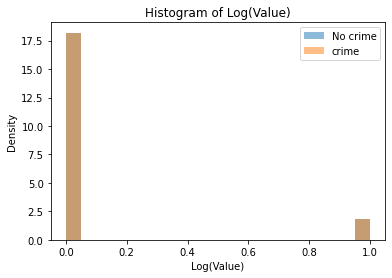

In [ ]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(X[y_cxn==0,48], bins=20, label='No crime', density=True, alpha=0.5)
_ = ax.hist(X[y_cxn==1,48], bins=bins, label='crime', density=True, alpha=0.5)
ax.legend()
_ = ax.set(xlabel='Log(Value)', ylabel='Density', title='Histogram of Log(Value)')

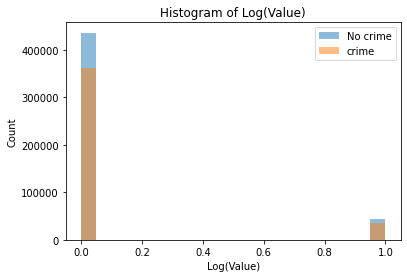

In [ ]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(X[y_cxn==0,48], bins=20, label='No crime', density=False, alpha=0.5)
_ = ax.hist(X[y_cxn==1,48], bins=bins, label='crime', density=False, alpha=0.5)
ax.legend()
_ = ax.set(xlabel='Log(Value)', ylabel='Count', title='Histogram of Log(Value)')

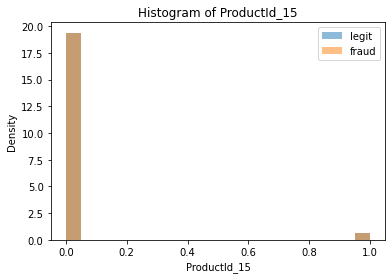

In [ ]:
fig, ax = plt.subplots()
_, bins, _ = ax.hist(X[y_cxn==0,10], bins=20, label='legit', density=True, alpha=0.5)
_ = ax.hist(X[y_cxn==1,10], bins=bins, label='fraud', density=True, alpha=0.5)
ax.legend()
_ = ax.set(xlabel='ProductId_15', ylabel='Density', title='Histogram of ProductId_15')

In [ ]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X[train_mask,:], y_cxn[train_mask])

y_hat_val_rf = rf.predict_proba(X[val_mask,:])
y_val_rf = rf.predict(X[val_mask,:])
rf

RandomForestClassifier(n_estimators=300)

In [ ]:
clf_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
clf_balanced.fit(X[train_mask,:], y_cxn[train_mask])

y_hat_val_lrb = clf_balanced.predict_proba(X[val_mask,:])
y_val_lrb = clf_balanced.predict(X[val_mask,:])

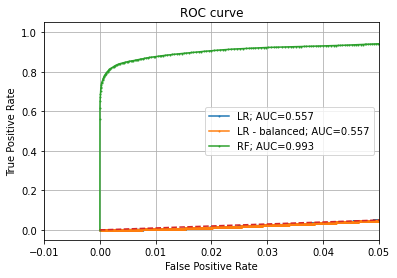

In [ ]:
plot_roc(
    [y_cxn[val_mask]]*3, 
    [y_hat_val_lr[:,1], y_hat_val_lrb[:,1], y_hat_val_rf[:,1]], 
    ['LR', 'LR - balanced', 'RF'],
    x_max=0.05,
)

LR
Best threshold:  0.5921583600697699
Best F1-Score:  nan
LR - balanced
Best threshold:  0.6361093846196936
Best F1-Score:  nan
RF
Best threshold:  0.35
Best F1-Score:  0.944228093430705


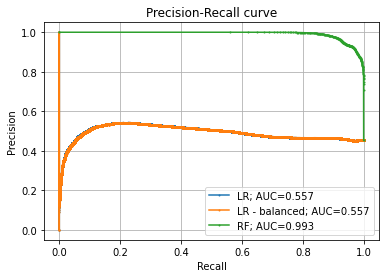

In [ ]:
plot_pr(
    [y_cxn[val_mask]]*3, 
    [y_hat_val_lr[:,1], y_hat_val_lrb[:,1], y_hat_val_rf[:,1]], 
    ['LR', 'LR - balanced', 'RF'],
)

In [ ]:
from dgl.nn import GraphConv, HeteroGraphConv, WeightBasis

In [ ]:
def plot_losses(train_losses, val_losses, log=False):
    """
    Plots train/validation loss curves vs training epoch
    """
    fig, ax = plt.subplots()

    ax.plot(train_losses, label='Train')
    ax.plot(val_losses, label='Val')
    ax.set(xlabel='Epoch', ylabel='CrossEnt')
    if log:
        ax.set_yscale('log')
    ax.legend()
    ax.grid()
    
@th.no_grad()
def infer(model_cp, hg, mask, best_model_fp=None):
    if best_model_fp:
        print("loading from disk")
        model = deepcopy(model_cp)
        model.load_state_dict(th.load(best_model_fp))
    else:
        model = model_cp
        
    model.to(device)
    
    model.eval()
    
    features = hg.ndata['feat']

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15]*len(model.convs))
    dataloader = NodeDataLoader(
        hg, {'cxnIdx': th.where(mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)
    
    y_preds = list()
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]].to(device) for k in input_nodes.keys()}
        blocks = [b.to(device) for b in blocks]
        
        logits = model(blocks, h)
        y_preds.append(logits.softmax(dim=1))
        
    return th.cat(y_preds).cpu()
    
@th.no_grad()
def test(model, hg, mask, best_path=None):

    model.eval()
    
    features = hg.ndata['feat']

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15]*len(model.convs))
    dataloader = NodeDataLoader(
        hg, {'cxnIdx': th.where(mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)

    labels = hg.ndata['label']['CatId'].long()
    

    correct = list()
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]].to(device) for k in input_nodes.keys()}
        blocks = [b.to(device) for b in blocks]
        
        logits = model(blocks, h)
        y_preds = logits.argmax(1)
        n_correct = (labels[output_nodes['cxnIdx']]==y_preds).sum().item()
        correct.append((labels[output_nodes['cxnIdx']]==y_preds).sum().item())


    acc = sum(correct)/(th.where(mask)[0].shape[0])

    return acc

def train_step(model, hg, features, train_mask, val_mask, optimizer, loss_fn, weight=False):
    """
    A single training step
    """
    model.train()
    optimizer.zero_grad()

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15]*len(model.convs))
    dataloader = NodeDataLoader(
        hg, {'cxnIdx': th.where(train_mask)[0]}, sampler,
        batch_size=1024, shuffle=True, drop_last=False, num_workers=0)
    
    val_loader = NodeDataLoader(
        hg, {'cxnIdx': th.where(val_mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)
    
    train_losses = list()
    if weight:
        weight = th.tensor([1., 1/baseline]).float().to(device)
    else:
        weight = None
        
#    labels = hg.ndata['label']['pdDistrict'].long()
    
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]].to(device) for k in input_nodes.keys()}
        blocks = [b.to(device) for b in blocks]
        
        logits = model(blocks, h)
        loss = loss_fn(logits, labels[output_nodes['cxnIdx']], weight=weight)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        train_losses.append(loss.item())
    

    val_losses = list()
    with th.no_grad():
        for input_nodes, output_nodes, blocks in val_loader:
            h = {k: features[k][input_nodes[k]].to(device) for k in input_nodes.keys()}
            blocks = [b.to(device) for b in blocks]
            
            logits = model(blocks, h)
            val_loss = loss_fn(logits, labels[output_nodes['cxnIdx']])
            val_losses.append(val_loss.item())

    return np.array(train_losses).mean(), np.array(val_losses).mean()

def train(hg, split_idx, model, epochs, evaluator, 
          device, save_path, loss_fn=F.cross_entropy, lr=0.01, 
          es_criteria=5, weight_class=False, verbose=False):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    best_val_metric = 1e10
    train_losses = list()
    val_losses = list()

    features = hg.ndata['feat']
  
    train_mask = split_idx['train'].to(device)
    val_mask = split_idx['valid'].to(device)
    es_iters = 0
    
    for e in range(1, epochs+1):
        
        # print("Training step")
        train_loss, val_loss = train_step(
            model, hg, features, train_mask, val_mask, optimizer, loss_fn, weight_class,
        )
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Compute accuracy on training/validation/test
        # print("Train eval")
        train_acc = test(model, hg, train_mask)
        # print("Val eval")
        val_acc = test(model, hg, val_mask)
        
        val_metric = val_loss
        
        if val_metric > 1e5:
            print(f"Early stopping for huge loss: {val_metric}")
            break

        # Save the best validation accuracy and the corresponding test accuracy.
        if val_metric < best_val_metric  :
            best_val_metric = val_metric
            th.save(model.state_dict(), save_path)
            es_iters = 0
        else:
            es_iters += 1
            

        if e % 5 == 0 and verbose:
#             for name, param in model.named_parameters():
#                 print(name, param.grad.max(), param.grad.min())
            
            print('In epoch {}, loss: {:.3f}, val metric: {:.3f} (best {:.3f})'.format(
                e, train_loss, val_metric, best_val_metric))
            
        if es_iters >= es_criteria:
            print(f"Early stopping at {e} epochs")
            break
            
    return np.array(train_losses), np.array(val_losses)

In [ ]:
class RelGraphConvLayer(nn.Module):
    r"""Relational graph convolution layer.
    Parameters
    ----------
    in_feat : int
        Input feature size.
    out_feat : int
        Output feature size.
    rel_names : list[str]
        Relation names.
    num_bases : int, optional
        Number of bases. If is none, use number of relations. Default: None.
    weight : bool, optional
        True if a linear layer is applied after message passing. Default: True
    bias : bool, optional
        True if bias is added. Default: True
    activation : callable, optional
        Activation function. Default: None
    self_loop : bool, optional
        True to include self loop message. Default: False
    dropout : float, optional
        Dropout rate. Default: 0.0
    """
    def __init__(self,
                 in_feat,
                 out_feat,
                 rel_names,
                 *,
                 num_bases=None,
                 weight=True,
                 bias=True,
                 activation=None,
                 self_loop=False,
                 bn=False,
                 dropout=0.0):
        super(RelGraphConvLayer, self).__init__()
        self.in_feat = in_feat
        self.out_feat = out_feat
        self.rel_names = rel_names
        self.num_bases = num_bases
        self.bias = bias
        self.activation = activation
        self.self_loop = self_loop
        self.bn = bn

        self.conv = HeteroGraphConv({
                rel : GraphConv(in_feat, out_feat, norm='right', weight=False, bias=False)
                for rel in rel_names
            })

        self.use_weight = weight
        self.use_basis = num_bases is not None and num_bases < len(self.rel_names) and weight
        if self.use_weight:
            if self.use_basis:
                self.basis = WeightBasis((in_feat, out_feat), num_bases, len(self.rel_names))
            else:
                self.weight = nn.Parameter(th.Tensor(len(self.rel_names), in_feat, out_feat))
                nn.init.xavier_uniform_(self.weight, gain=nn.init.calculate_gain('relu'))

        # bias
        if bias:
            self.h_bias = nn.Parameter(th.Tensor(out_feat))
            nn.init.zeros_(self.h_bias)

        # weight for self loop
        if self.self_loop:
            self.loop_weight = nn.Parameter(th.Tensor(in_feat, out_feat))
            nn.init.xavier_uniform_(self.loop_weight,
                                    gain=nn.init.calculate_gain('relu'))
            
        if self.bn:
            self.bn_layer = nn.BatchNorm1d(out_feat)

        self.dropout = nn.Dropout(dropout)

    def forward(self, g, inputs):
        """Forward computation
        Parameters
        ----------
        g : DGLHeteroGraph
            Input graph.
        inputs : dict[str, torch.Tensor]
            Node feature for each node type.
        Returns
        -------
        dict[str, torch.Tensor]
            New node features for each node type.
        """
        g = g.local_var()
        if self.use_weight:
            weight = self.basis() if self.use_basis else self.weight
            wdict = {self.rel_names[i] : {'weight' : w.squeeze(0)}
                     for i, w in enumerate(th.split(weight, 1, dim=0))}
        else:
            wdict = {}

        if g.is_block:
            inputs_src = inputs
            inputs_dst = {k: v[:g.number_of_dst_nodes(k)] for k, v in inputs.items()}
        else:
            inputs_src = inputs_dst = inputs

        hs = self.conv(g, inputs, mod_kwargs=wdict)

        def _apply(ntype, h):
            if self.self_loop:
                h = h + th.matmul(inputs_dst[ntype], self.loop_weight)
            if self.bias:
                h = h + self.h_bias
            if self.bn:
                h = self.bn_layer(h)
            if self.activation:
                h = self.activation(h)
            return self.dropout(h)
        return {ntype : _apply(ntype, h) for ntype, h in hs.items()}

In [ ]:
class RGCN(nn.Module):
    def __init__(self, hg, in_feats, h_feats, num_classes, num_layers, num_bases, 
                 self_loop=True, dropout=0, bn=False):

        super(RGCN, self).__init__()
        self.dropout = dropout
        
        # GNN layers
        self.convs = nn.ModuleList()
        activation_fn = nn.ReLU()
        self.convs.append(RelGraphConvLayer(
            in_feats, h_feats, hg.etypes, activation=activation_fn, dropout=dropout, 
            num_bases=num_bases, self_loop=self_loop, bn=bn))

        for _ in range(num_layers-1):
            self.convs.append(RelGraphConvLayer(
                h_feats, h_feats, hg.etypes, activation=activation_fn, dropout=dropout, 
                num_bases=num_bases, self_loop=self_loop, bn=bn
            ))
        
        # Output linear layer
        self.output_layer = nn.Linear(h_feats+in_feats, num_classes)

    def forward(self, blocks, in_feat):
        """
        The forward pass of the model, which applies all of the layers
        to a given graph and set of node features
        
        Args:
            g (DGLGraph): the graph used for Graph Convolutions
            in_feat (Tensor): the node features
        """
        h = in_feat
        for i, conv in enumerate(self.convs):
            h = conv(blocks[i], h)

#        h_in = blocks[-1].dstdata['feat']['cxnIdx']
 #       h = self.output_layer(th.cat([h['cxnIdx'], h_in], dim=1))
        return h

    
class LabelSmoothing(nn.Module):
    """NLL loss with label smoothing.
    """
    def __init__(self, smoothing=0.0):
        """Constructor for the LabelSmoothing module.
        :param smoothing: label smoothing factor
        """
        super(LabelSmoothing, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing

    def forward(self, x, target, weight=None):
        logprobs = nn.functional.log_softmax(x, dim=-1)
        nll_loss = -logprobs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -logprobs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()

In [ ]:
for ntype in hg.ntypes:
    if ntype=='cxnIdx':
        X_tmp = th.tensor(X).float() # the natural features
    else:
        # random values as features
#         X_rand = th.zeros((hg.num_nodes(ntype), X.shape[1]-1))
        X_rand = th.rand((hg.num_nodes(ntype), X.shape[1]-1))-0.5

        print(ntype, hg.num_nodes(ntype))
        in_degrees = th.zeros(hg.num_nodes(ntype))
        for cetype in hg.canonical_etypes:
            if ntype==cetype[2]:
                print(cetype)
                in_degrees += hg.in_degrees(etype=cetype)
        in_degrees = th.log(in_degrees).reshape((-1, 1))
        in_degrees -= in_degrees.mean()

        X_tmp = th.hstack([X_rand, in_degrees])
    hg.nodes[ntype].data['feat'] = X_tmp

PdDistrict 10
('catIdx', 'catIdx-PdDistrict', 'PdDistrict')
catIdx 878049
('PdDistrict', 'PdDistrict-catIdx', 'catIdx')


In [ ]:
split_mask = {
    'train': th.tensor(train_mask),
    'valid': th.tensor(val_mask),
    'test': th.tensor(test_mask)
}

In [ ]:
model_kwargs = dict(
    in_feats=X.shape[1], h_feats=256, num_classes=2, 
    num_layers=2, dropout=0.1, num_bases=None,
    self_loop=False, bn=True,
)
model = RGCN(hg, **model_kwargs).to(device)
model

RGCN(
  (convs): ModuleList(
    (0): RelGraphConvLayer(
      (activation): ReLU()
      (conv): HeteroGraphConv(
        (mods): ModuleDict(
          (PdDistrict-catIdx): GraphConv(in=55, out=256, normalization=right, activation=None)
          (catIdx-PdDistrict): GraphConv(in=55, out=256, normalization=right, activation=None)
        )
      )
      (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): RelGraphConvLayer(
      (activation): ReLU()
      (conv): HeteroGraphConv(
        (mods): ModuleDict(
          (PdDistrict-catIdx): GraphConv(in=256, out=256, normalization=right, activation=None)
          (catIdx-PdDistrict): GraphConv(in=256, out=256, normalization=right, activation=None)
        )
      )
      (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (output_layer):

In [ ]:
loss_fn = LabelSmoothing(smoothing=0.1)